## Stacked AutoEncoder

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.examples.tutorials.mnist import input_data


In [5]:
mnist = input_data.read_data_sets("../03-Convolutional-Neural-Networks/MNIST_data/",one_hot=True)


W0620 02:54:33.736525 140147395250048 deprecation.py:323] From <ipython-input-5-188b088e0975>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0620 02:54:33.739840 140147395250048 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0620 02:54:33.741379 140147395250048 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruction

Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-images-idx3-ubyte.gz


W0620 02:54:34.021290 140147395250048 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0620 02:54:34.024252 140147395250048 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0620 02:54:34.080626 140147395250048 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Extracting ../03-Convolutional-Neural-Networks/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../03-Convolutional-Neural-Networks/MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
tf.reset_default_graph()

### Parameters

In [0]:
num_inputs = 28*28
neurons_hid1 = num_inputs//2 #must be int
neurons_hid2 = neurons_hid1//2 #must be int
neurons_hid3 = neurons_hid1
num_outputs = num_inputs

learning_rate = 0.0005

In [0]:
x = tf.placeholder(tf.float32, shape = [None, num_inputs], name='X')


In [0]:
#when relue activation function is used, it's recommended to use He initialization
initializer = tf.variance_scaling_initializer()

In [0]:
w1 = tf.Variable(initial_value=initializer([num_inputs, neurons_hid1]), dtype = tf.float32)
w2 = tf.Variable(initial_value=initializer([neurons_hid1, neurons_hid2]), dtype=tf.float32)
w3 = tf.Variable(initial_value=initializer([neurons_hid2, neurons_hid3]), dtype=tf.float32)
w4 = tf.Variable(initial_value=initializer([neurons_hid3, num_outputs]), dtype=tf.float32)

In [0]:
b1 = tf.Variable(initial_value=initializer([neurons_hid1]))
b2 = tf.Variable(initial_value=initializer([neurons_hid2]))
b3 = tf.Variable(initial_value=initializer([neurons_hid3]))
b4 = tf.Variable(initial_value=initializer([num_outputs]))

In [11]:
hid_layer1 = tf.nn.relu(tf.matmul(x, w1)+b1)
hid_layer2 = tf.nn.relu(tf.matmul(hid_layer1, w2)+b2)
hid_layer3 = tf.nn.relu(tf.matmul(hid_layer2, w3)+b3)
out_layer = tf.matmul(hid_layer3, w4)+b4
tf.identity(out_layer, name='outputs_node')

<tf.Tensor 'outputs_node:0' shape=(?, 784) dtype=float32>

In [0]:
loss = tf.reduce_mean(tf.square(out_layer - x))

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train = optimizer.minimize(loss)

### Session

In [0]:
init = tf.global_variables_initializer()

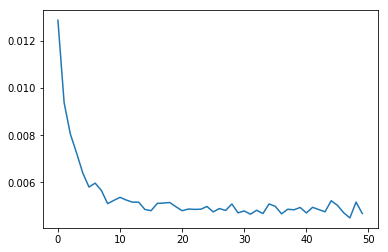

In [15]:
saver = tf.train.Saver()
num_epochs = 50
batch_size = 150
LOSS = []
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        num_batches = mnist.train.num_examples//batch_size
        for iteration in range(num_batches):
            x_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(train, {x: x_batch})
        training_loss = loss.eval({x: x_batch})
        #print ('Epoch {} Complete; Loss {}'.format(epoch, training_loss))
        LOSS.append(training_loss)
    saver.save(sess, './stacked_autoencoder_model')
    #results = out_layer.eval({x: mnist.test.images[:num_test_images]})
plt.plot(LOSS)

In [0]:

num_test_images = 10
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    saver = tf.train.import_meta_graph('./stacked_autoencoder_model.meta')
    saver.restore(sess,tf.train.latest_checkpoint('./'))
    graph = tf.get_default_graph()
    x = graph.get_tensor_by_name('X:0')
    pred = graph.get_tensor_by_name('outputs_node:0')
    
    results_1 = pred.eval({x: mnist.test.images[:num_test_images]})
    results_2 = pred.eval({x: mnist.test.images[-num_test_images:]})
    

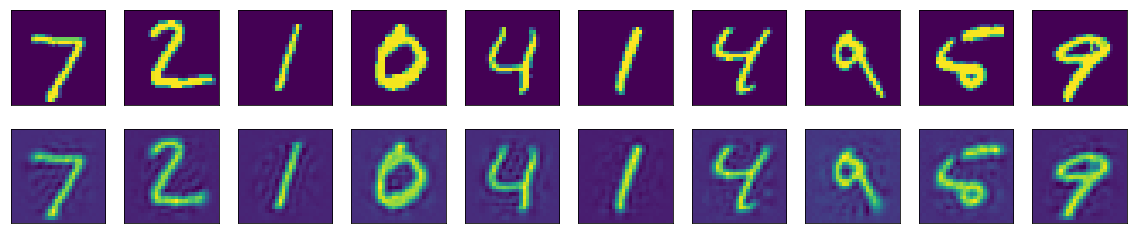

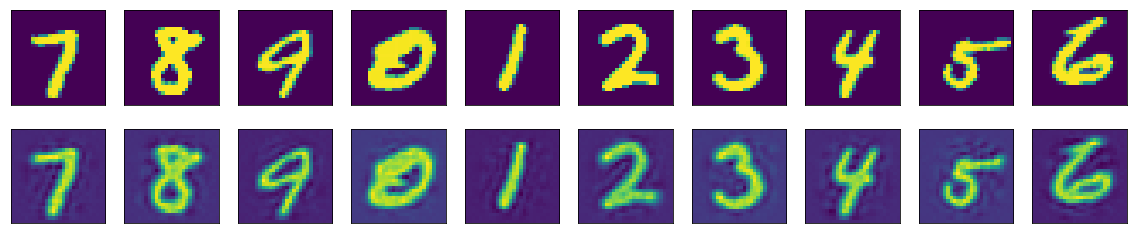

In [25]:
f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(num_test_images):
  a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
  a[1][i].imshow(np.reshape(results_1[i], (28, 28)))
  for j in range(2):
    a[j][i].tick_params(axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False)
    a[j][i].tick_params(axis='y',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                left=False,      # ticks along the bottom edge are off
                right=False,         # ticks along the top edge are off
                labelleft=False)
plt.show()

print ('='*140)

f, a = plt.subplots(2, 10, figsize=(20, 4))
for i in range(num_test_images):
  a[0][i].imshow(np.reshape(mnist.test.images[-num_test_images+i], (28, 28)))
  a[1][i].imshow(np.reshape(results_2[i], (28, 28)))  
  for j in range(2):
    a[j][i].tick_params(axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False)
    a[j][i].tick_params(axis='y',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
                left=False,      # ticks along the bottom edge are off
                right=False,         # ticks along the top edge are off
                labelleft=False)
plt.show()